In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, LSTM, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [2]:
import pandas as pd

In [3]:
# Define folder path and target size
folder_path = r'D:\Sem4\Data_298B_Project\298B_Data_Copy'
target_size = (224, 224)

# Initialize lists to store images and labels
images = []
labels = []

# Dictionary to store label counts
label_counts = {}

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Initialize lists to store image statistics
image_statistics = []

# Loop through each label (sub-folder) in the folder path
for label in os.listdir(folder_path):
    label_folder = os.path.join(folder_path, label)
    num_images = len(os.listdir(label_folder))
    label_counts[label] = num_images
    for image_name in os.listdir(label_folder):
        image_path = os.path.join(label_folder, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, target_size)
        images.append(image)
        labels.append(label)
        # Calculate image statistics
        image_mean = np.mean(image)
        image_std = np.std(image)
        # Add image statistics to the list
        image_statistics.append({'Image_Path': image_path, 'Label': label, 'Mean': image_mean, 'Std': image_std})

# Convert images and labels to numpy arrays
images = np.array(images)

# Encode labels
label_encoder.fit(labels)
labels_encoded = label_encoder.transform(labels)

# Calculate the number of classes
num_classes = len(label_encoder.classes_)

# Print number of images in each category
for label, count in label_counts.items():
    print(f"Label: {label}, Number of Images: {count}")

# Convert image statistics to DataFrame
image_statistics_df = pd.DataFrame(image_statistics)

# Describe images before feature extraction
image_statistics_description = image_statistics_df.groupby('Label')
print(image_statistics_description)


Label: African_Swine_Fever, Number of Images: 11
Label: Erysipelas, Number of Images: 40
Label: Foot_and_Mouth_Disease, Number of Images: 15
Label: Greasy_Pig_Disease, Number of Images: 26
Label: Hog_Cholera, Number of Images: 22
Label: Mastitis, Number of Images: 20
Label: PDNS, Number of Images: 17
Label: Pityriasis_Rosea, Number of Images: 18
Label: Ringworm, Number of Images: 25
Label: Sarcoptic_Mange, Number of Images: 24
Label: Swine_Pox, Number of Images: 21
Label: Swine_Vesicular_Disease, Number of Images: 16


In [4]:
# Describe images before feature extraction and print in one line
image_statistics_description = image_statistics_df.groupby('Label').describe().transpose().to_string()
print(image_statistics_description)

Label       African_Swine_Fever  Erysipelas  Foot_and_Mouth_Disease  Greasy_Pig_Disease  Hog_Cholera    Mastitis        PDNS  Pityriasis_Rosea    Ringworm  Sarcoptic_Mange   Swine_Pox  Swine_Vesicular_Disease
Mean count            11.000000   40.000000               15.000000           26.000000    22.000000   20.000000   17.000000         18.000000   25.000000        24.000000   21.000000                16.000000
     mean            114.581692  119.914211              121.235687          115.764501   133.571705  120.654970  120.985392        110.286193  108.048509       116.179000  124.841086               115.981901
     std              29.580428   23.874171               27.405542           32.253941    26.528350   25.791742   36.703267         17.270024   26.401289        23.656403   30.142134                22.422883
     min              62.470956   90.214266               67.531861           48.505175   100.382726   71.055079   59.220457         86.542942   75.262549        67

In [5]:
# Describe images before feature extraction and print in one line
image_statistics_description = image_statistics_df.groupby('Label').describe().transpose()
print(image_statistics_description.to_string())


Label       African_Swine_Fever  Erysipelas  Foot_and_Mouth_Disease  Greasy_Pig_Disease  Hog_Cholera    Mastitis        PDNS  Pityriasis_Rosea    Ringworm  Sarcoptic_Mange   Swine_Pox  Swine_Vesicular_Disease
Mean count            11.000000   40.000000               15.000000           26.000000    22.000000   20.000000   17.000000         18.000000   25.000000        24.000000   21.000000                16.000000
     mean            114.581692  119.914211              121.235687          115.764501   133.571705  120.654970  120.985392        110.286193  108.048509       116.179000  124.841086               115.981901
     std              29.580428   23.874171               27.405542           32.253941    26.528350   25.791742   36.703267         17.270024   26.401289        23.656403   30.142134                22.422883
     min              62.470956   90.214266               67.531861           48.505175   100.382726   71.055079   59.220457         86.542942   75.262549        67

In [19]:
# Define folder path and target size
folder_path = r'/kaggle/input/new-data/298B_Data - Copy'
target_size = (224, 224)

# Initialize lists to store images and labels
images = []
labels = []

# Dictionary to store label counts
label_counts = {}

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Initialize lists to store image statistics
image_statistics = []

# Loop through each label (sub-folder) in the folder path
for label in os.listdir(folder_path):
    label_folder = os.path.join(folder_path, label)
    num_images = len(os.listdir(label_folder))
    label_counts[label] = num_images
    for image_name in os.listdir(label_folder):
        image_path = os.path.join(label_folder, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, target_size)
        images.append(image)
        labels.append(label)
        # Calculate image statistics
        image_mean = np.mean(image)
        image_std = np.std(image)
        # Add image statistics to the list
        image_statistics.append({'Image_Path': image_path, 'Label': label, 'Mean': image_mean, 'Std': image_std})

# Convert images and labels to numpy arrays
images = np.array(images)

# Encode labels
label_encoder.fit(labels)
labels_encoded = label_encoder.transform(labels)

# Calculate the number of classes
num_classes = len(label_encoder.classes_)

# Print number of images in each category
for label, count in label_counts.items():
    print(f"Label: {label}, Number of Images: {count}")

# Convert image statistics to DataFrame
image_statistics_df = pd.DataFrame(image_statistics)

# Describe images before feature extraction
image_statistics_description = image_statistics_df.groupby('Label').describe().transpose()
print(image_statistics_description)


Label: Swine_Pox, Number of Images: 21
Label: Greasy_Pig_Disease, Number of Images: 26
Label: African_Swine_Fever, Number of Images: 11
Label: Erysipelas, Number of Images: 40
Label: Swine_Vesicular_Disease, Number of Images: 16
Label: Hog_Cholera, Number of Images: 22
Label: Pityriasis_Rosea, Number of Images: 18
Label: Mastitis, Number of Images: 20
Label: Sarcoptic_Mange, Number of Images: 24
Label: Foot_and_Mouth_Disease, Number of Images: 15
Label: Ringworm, Number of Images: 25
Label: PDNS, Number of Images: 17
Label       African_Swine_Fever  Erysipelas  Foot_and_Mouth_Disease  \
Mean count            11.000000   40.000000               15.000000   
     mean            114.581692  119.914211              121.235687   
     std              29.580428   23.874171               27.405542   
     min              62.470956   90.214266               67.531861   
     25%              98.812277  102.823634              111.283715   
     50%             116.541361  117.123811        

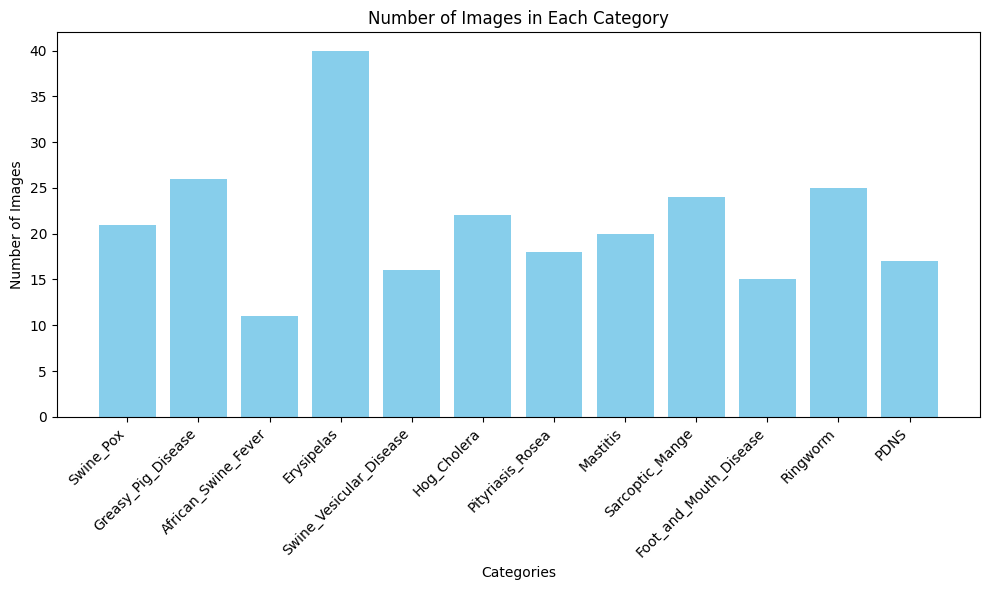

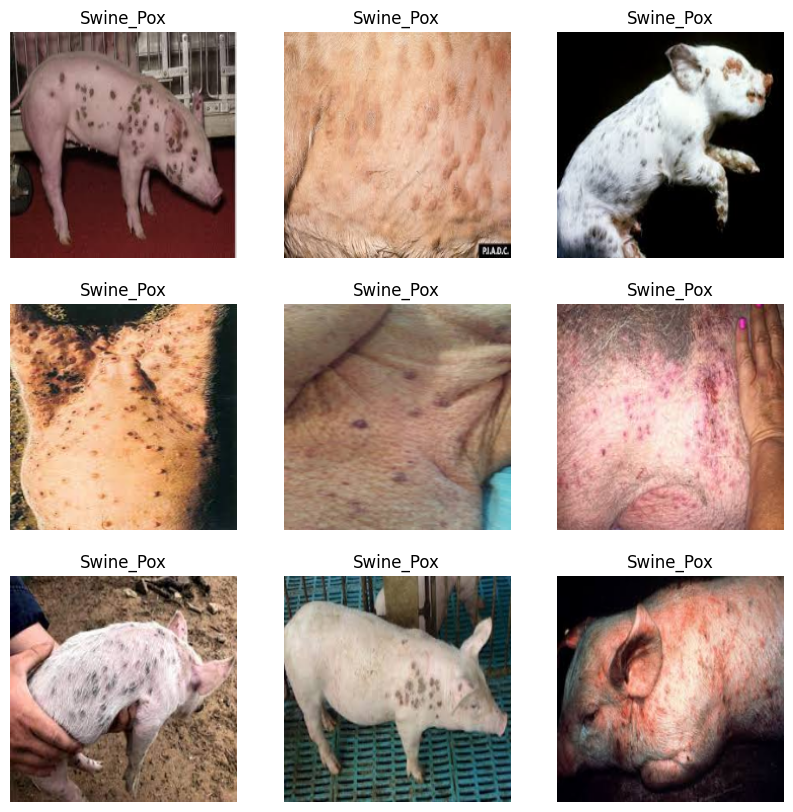

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Features shape: (255, 2048)
Features: [[0.91180116 0.6921728  0.01512002 ... 0.06872872 0.05648351 0.9398183 ]
 [0.4745625  0.24075064 0.00854966 ... 0.29007873 0.2967552  1.5413343 ]
 [0.26313093 0.23063517 0.00870173 ... 0.21234635 0.19035427 0.00760988]
 ...
 [0.29065543 0.2676874  0.04168743 ... 0.2653875  1.00828    0.8826498 ]
 [0.5916821  0.250729   0.20730878 ... 0.13588496 2.1043415  1.1301603 ]
 [0.15918233 0.60320777 0.46927902 ... 0.23323065 0.31510156 0.8975822 ]]


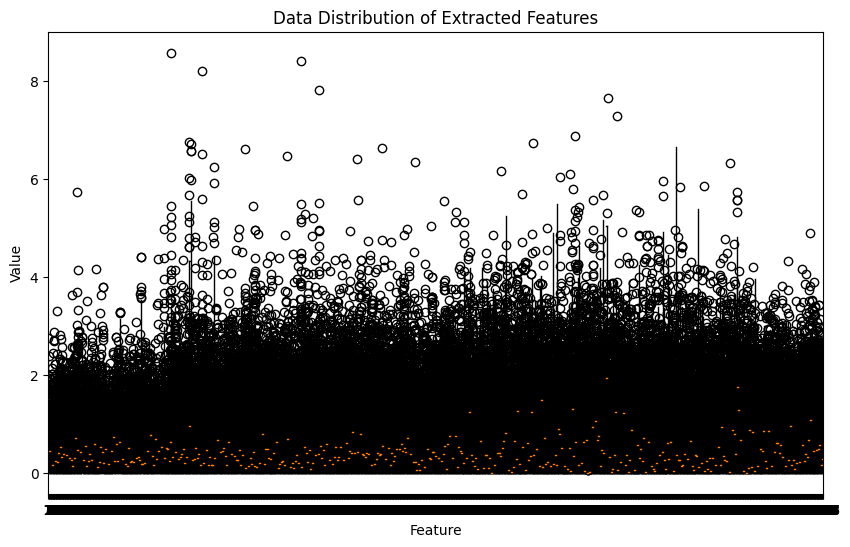

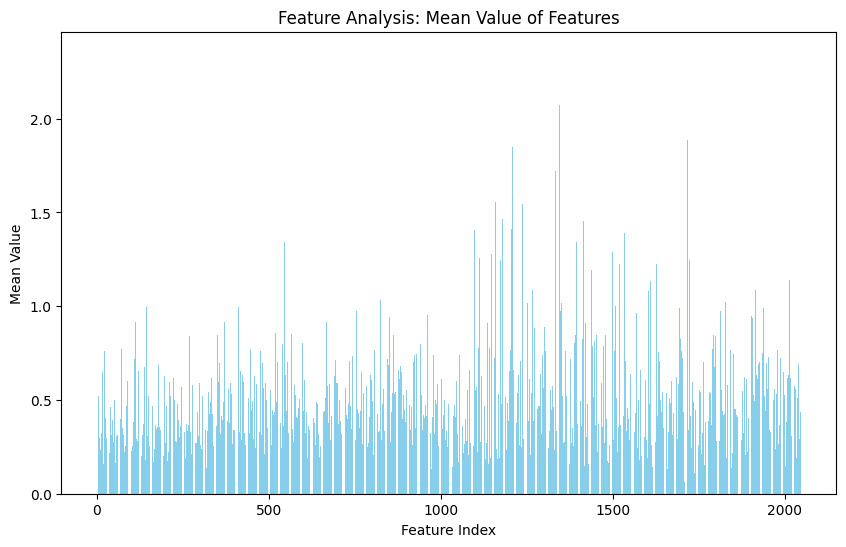

In [4]:
# Plot class distribution
plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize cropped images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(labels[i])
    plt.axis('off')
plt.show()

# Step 2: Extract Features using InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
model = Model(inputs=base_model.input, outputs=x)
preprocessed_images = preprocess_input(images)
features = model.predict(preprocessed_images)
print("Features shape:", features.shape)  # Print the shape of features
print("Features:", features)  # Print the features themselves



# Plot feature analysis
plt.figure(figsize=(10, 6))
plt.bar(range(features.shape[1]), np.mean(features, axis=0), color='skyblue')
plt.xlabel('Feature Index')
plt.ylabel('Mean Value')
plt.title('Feature Analysis: Mean Value of Features')
plt.show()



Number of samples in training set: 153
Number of samples in validation set: 51
Number of samples in test set: 51


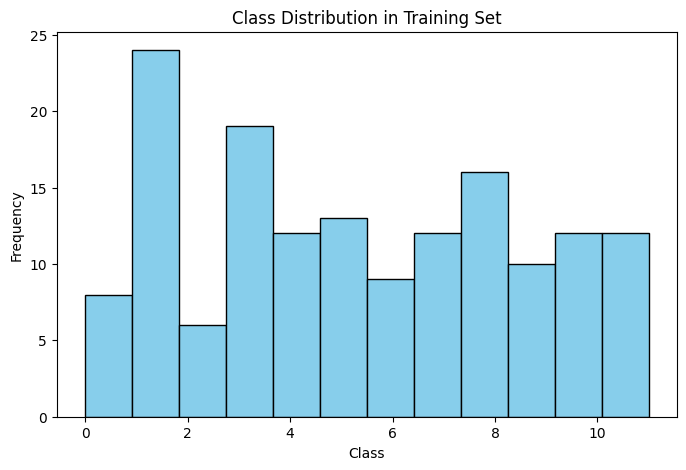

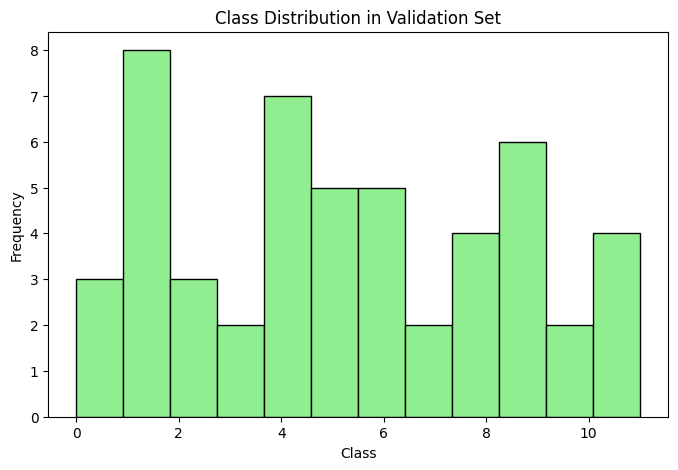

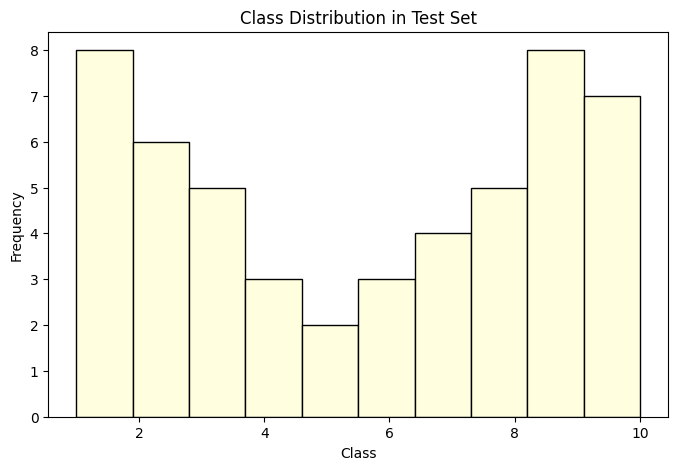

In [6]:
# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Print number of contents in each set
print("Number of samples in training set:", len(X_train))
print("Number of samples in validation set:", len(X_val))
print("Number of samples in test set:", len(X_test))

# Plot class distribution in training set
plt.figure(figsize=(8, 5))
plt.hist(y_train, bins=len(np.unique(y_train)), color='skyblue', edgecolor='black')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Plot class distribution in validation set
plt.figure(figsize=(8, 5))
plt.hist(y_val, bins=len(np.unique(y_val)), color='lightgreen', edgecolor='black')
plt.title('Class Distribution in Validation Set')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Plot class distribution in test set
plt.figure(figsize=(8, 5))
plt.hist(y_test, bins=len(np.unique(y_test)), color='lightyellow', edgecolor='black')
plt.title('Class Distribution in Test Set')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()



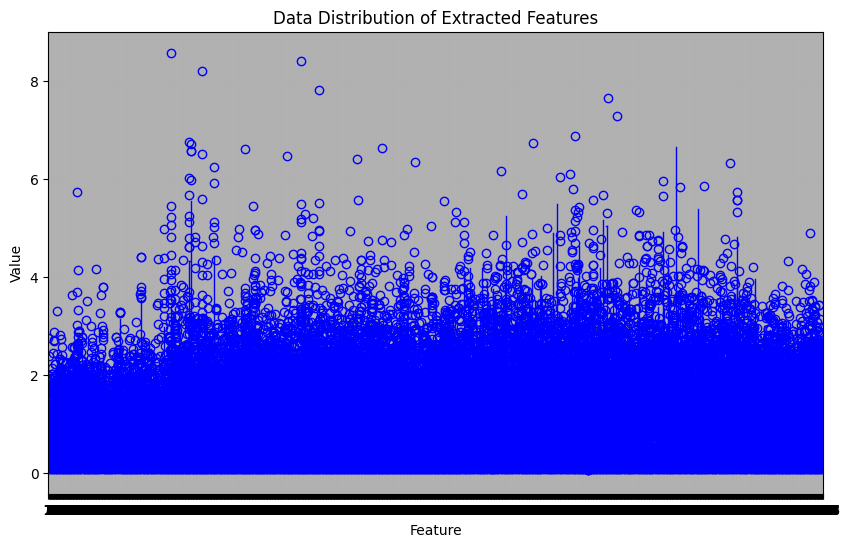

In [9]:
# Plot data distribution
plt.figure(figsize=(10, 6))
plt.boxplot(features, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), capprops=dict(color='blue'), whiskerprops=dict(color='blue'), flierprops=dict(markeredgecolor='blue'), medianprops=dict(color='blue'))
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Data Distribution of Extracted Features')
plt.grid(True, alpha=0.7)
plt.show()


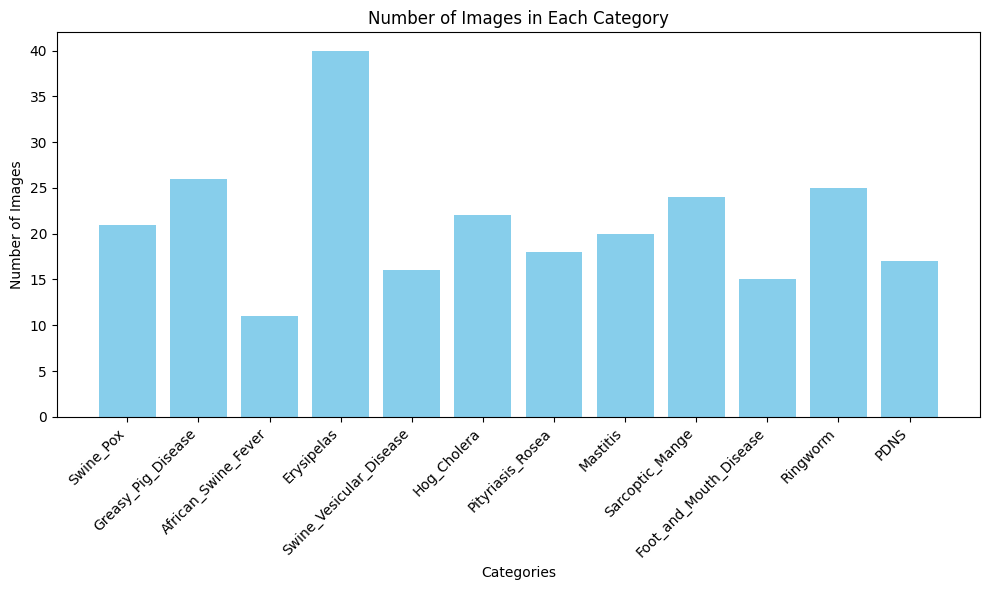

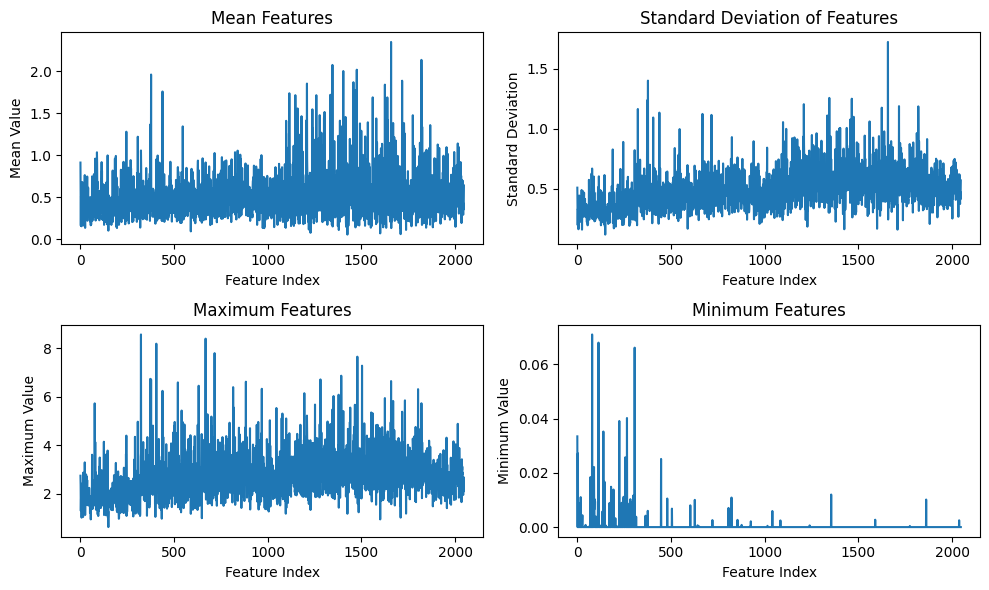

In [10]:
# Data Distribution
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Feature Analysis
# Calculate summary statistics for features
mean_features = np.mean(features, axis=0)
std_features = np.std(features, axis=0)
max_features = np.max(features, axis=0)
min_features = np.min(features, axis=0)

# Visualize summary statistics
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.plot(mean_features)
plt.title('Mean Features')
plt.xlabel('Feature Index')
plt.ylabel('Mean Value')

plt.subplot(2, 2, 2)
plt.plot(std_features)
plt.title('Standard Deviation of Features')
plt.xlabel('Feature Index')
plt.ylabel('Standard Deviation')

plt.subplot(2, 2, 3)
plt.plot(max_features)
plt.title('Maximum Features')
plt.xlabel('Feature Index')
plt.ylabel('Maximum Value')

plt.subplot(2, 2, 4)
plt.plot(min_features)
plt.title('Minimum Features')
plt.xlabel('Feature Index')
plt.ylabel('Minimum Value')

plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
features_df = pd.DataFrame(features)
features_description = features_df.describe()
print(features_description)

             0           1           2           3           4           5     \
count  255.000000  255.000000  255.000000  255.000000  255.000000  255.000000   
mean     0.911924    0.401075    0.161764    0.512257    0.400550    0.519934   
std      0.508291    0.344635    0.195585    0.331194    0.317510    0.373962   
min      0.033439    0.000000    0.000000    0.027201    0.000000    0.000000   
25%      0.529196    0.173114    0.022269    0.265084    0.149258    0.236233   
50%      0.834071    0.319570    0.090708    0.440021    0.337013    0.449009   
75%      1.260221    0.528330    0.246784    0.698647    0.549665    0.694381   
max      2.752184    2.370850    1.306009    1.799796    1.658631    1.933474   

             6           7           8           9     ...        2038  \
count  255.000000  255.000000  255.000000  255.000000  ...  255.000000   
mean     0.154480    0.264557    0.297590    0.479030  ...    0.699753   
std      0.160861    0.234024    0.278090    0.3